In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
from scipy.stats import f_oneway

In [8]:
def checkAnova(categ_col,num_col,df):
  p=f_oneway(*df.groupby(categ_col)[num_col].apply(list))[1]

  if p > 0.05:
    print('Accept Null Hypothesis')
  else:
    print('Reject Null Hypothesis')


In [9]:
checkAnova('sex','tip',df)
checkAnova('smoker','tip',df)
checkAnova('day','tip',df)
checkAnova('time','tip',df)

Accept Null Hypothesis
Accept Null Hypothesis
Accept Null Hypothesis
Accept Null Hypothesis


/tmp/ipython-input-3214495492.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p=f_oneway(*df.groupby(categ_col)[num_col].apply(list))[1]


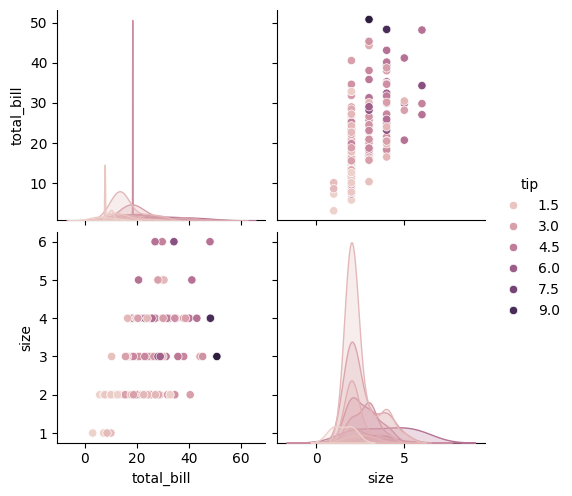

In [11]:
sns.pairplot(df,hue='tip')

In [21]:
df['high_tip'] = (df['tip'] > df['tip'].median()).astype(int)


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['sex','smoker','day','time']:
    df[col] = le.fit_transform(df[col])

In [24]:
X = df.drop(['tip','high_tip'], axis=1)
y = df['high_tip']


In [32]:
from sklearn.metrics import accuracy_score, classification_report

In [26]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [33]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.8163265306122449
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.80      0.89      0.84        27

    accuracy                           0.82        49
   macro avg       0.82      0.81      0.81        49
weighted avg       0.82      0.82      0.81        49



In [34]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))
print(classification_report(y_test, ada_pred))

AdaBoost Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.94      0.73      0.82        22
           1       0.81      0.96      0.88        27

    accuracy                           0.86        49
   macro avg       0.88      0.85      0.85        49
weighted avg       0.87      0.86      0.85        49



In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("\n--- Naive Bayes ---")
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.7142857142857143

--- Naive Bayes ---
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        22
           1       0.76      0.70      0.73        27

    accuracy                           0.71        49
   macro avg       0.71      0.72      0.71        49
weighted avg       0.72      0.71      0.72        49



In [36]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
print("QDA Accuracy:", accuracy_score(y_test, qda_pred))
print("\n--- QDA ---")
print(classification_report(y_test, qda_pred))

QDA Accuracy: 0.6326530612244898

--- QDA ---
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        22
           1       0.66      0.70      0.68        27

    accuracy                           0.63        49
   macro avg       0.63      0.62      0.62        49
weighted avg       0.63      0.63      0.63        49

